In [311]:
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [312]:
samp = pd.read_csv('/content/drive/MyDrive/analytics_vidhya/sample_4E0BhPN.csv')
train = pd.read_csv('/content/drive/MyDrive/analytics_vidhya/train_E1GspfA.csv')
test = pd.read_csv('/content/drive/MyDrive/analytics_vidhya/test_6QvDdzb.csv')

In [314]:
#basic eda
def eda(df):
    print('--------------------------------------------HEAD-----------------------------------------------')
    print(df.head())
    print('--------------------------------------------TAIL-----------------------------------------------')
    print(df.tail())
    print('--------------------------------------------SHAPE-----------------------------------------------')
    print(df.shape)
    print('--------------------------------------------IS_NULL_SUM-----------------------------------------------')
    print(df.isnull().sum())
    print('--------------------------------------------IS_NA_SUM-----------------------------------------------')
    print(df.isna().sum())
    print('--------------------------------------------COLUMNS-----------------------------------------------')
    print(df.columns)
    print('--------------------------------------------DTYPES-----------------------------------------------')
    print(df.dtypes)
    print('--------------------------------------------DESCRIBE-----------------------------------------------')
    print(df.describe())
    print('--------------------------------------------INFO-----------------------------------------------')
    print(df.info())

In [315]:
eda(train)

--------------------------------------------HEAD-----------------------------------------------
         date  hour  demand
0  2018-08-18     9      91
1  2018-08-18    10      21
2  2018-08-18    13      23
3  2018-08-18    14     104
4  2018-08-18    15      81
--------------------------------------------TAIL-----------------------------------------------
             date  hour  demand
18242  2021-02-28    19      95
18243  2021-02-28    20      88
18244  2021-02-28    21      39
18245  2021-02-28    22     104
18246  2021-02-28    23      85
--------------------------------------------SHAPE-----------------------------------------------
(18247, 3)
--------------------------------------------IS_NULL_SUM-----------------------------------------------
date      0
hour      0
demand    0
dtype: int64
--------------------------------------------IS_NA_SUM-----------------------------------------------
date      0
hour      0
demand    0
dtype: int64
--------------------------------------

In [428]:
df = pd.read_csv('/content/drive/MyDrive/analytics_vidhya/train_E1GspfA.csv')
d = df.groupby('date')['hour'].apply(list).to_dict()
d = [{k: v} for k, v in d.items()]
a = []
for i in range(0,24):
  a.append(i)
for i in range(len(d)):
  for j in d[i]:
    d[i][j] = a
df1 = pd.DataFrame([{"date": date,"hour":value} for date, value in d[0].items()])
for  i in range(1,len(d)):
  df1 = df1.append([{"date": date,"hour":value} for date, value in d[i].items()])
df1 = df1.explode('hour')
df1['demand'] = 0
df1.reset_index(inplace=True,drop=True)
df = pd.concat([df, df1[~df1['demand'].isin(df['demand'])].dropna()]).sort_values(['date','hour','demand']).reset_index(drop=True)
df['Datetime'] = ''
for i in df.index:
  df.Datetime[i] = df.date[i]+" "+str(df.hour[i])+":00:00"
df['date'] = pd.to_datetime(df['Datetime'], format='%Y-%m-%d %H:%M:%S')
df.drop(['Datetime','hour'],axis=1,inplace=True)
aggregation_functions = {'demand': 'sum'}
df2 =  df.groupby(df['date']).aggregate(aggregation_functions)
df2.reset_index(inplace=True)
df1['demand'] = df2['demand']
df = df1.copy()
df['Datetime'] = ''
for i in df.index:
  df.Datetime[i] = df.date[i]+" "+str(df.hour[i])+":00:00"
df['date'] = pd.to_datetime(df['Datetime'], format='%Y-%m-%d %H:%M:%S')
df.drop(['Datetime','hour'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [429]:
df_test = pd.read_csv('/content/drive/MyDrive/analytics_vidhya/test_6QvDdzb.csv')
df_test['Datetime'] = ''
for i in df_test.index:
  df_test.Datetime[i] = df_test.date[i]+" "+str(df_test.hour[i])+":00:00"
df_test['date'] = pd.to_datetime(df_test['Datetime'], format='%Y-%m-%d %H:%M:%S')
df_test.drop(['Datetime','hour'],axis=1,inplace=True)
df_test.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,date
0,2021-03-01 00:00:00
1,2021-03-01 01:00:00
2,2021-03-01 02:00:00
3,2021-03-01 03:00:00
4,2021-03-01 05:00:00


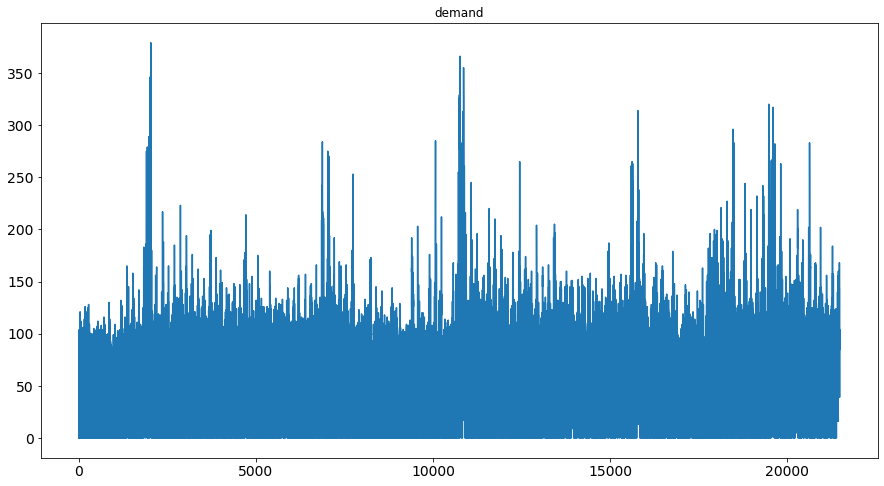

In [344]:
df.demand.plot(figsize=(15,8), title= 'demand', fontsize=14)
plt.show()

In [432]:
df.Timestamp = pd.to_datetime(df.date,format='%d-%m-%Y %H:%M') 
df.index = df.Timestamp 
df = df.resample('H').mean()
train=df[0:19950] 
test=df[20700:]
# train.Timestamp = pd.to_datetime(train.date,format='%d-%m-%Y %H:%M:%S') 
# train.index = train.Timestamp 
# train = train.resample('H').mean() 
# test.Timestamp = pd.to_datetime(test.date,format='%d-%m-%Y %H:%M:%S') 
# test.index = test.Timestamp 
# test = test.resample('H').mean()

In [ ]:
train.dropna(inplace=True,axis=0)

In [ ]:
test['demand']=test['demand'].astype(int)
train['demand']=train['demand'].astype(int)

## 1. Naive's Approach

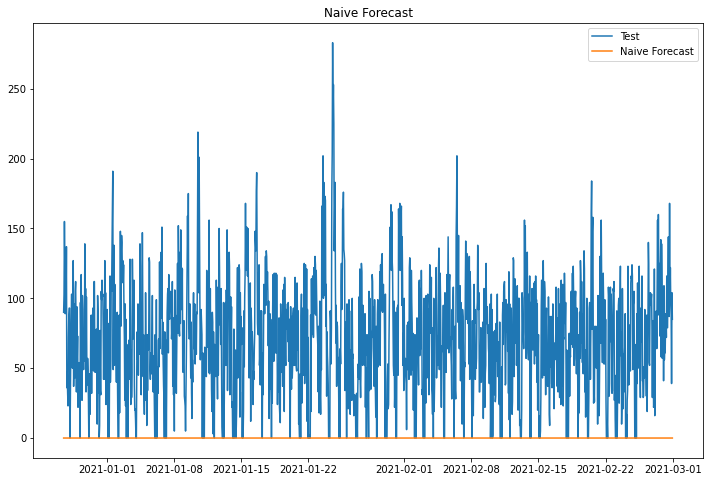

In [437]:
dd= np.asarray(train.demand)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(test.index,test['demand'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

We can infer from the graph above, that Naive method isn’t suited for datasets with high variability. It is best suited for stable datasets. We can still improve our score by adopting different techniques.

## 2. Simple Average Forecasting Approach

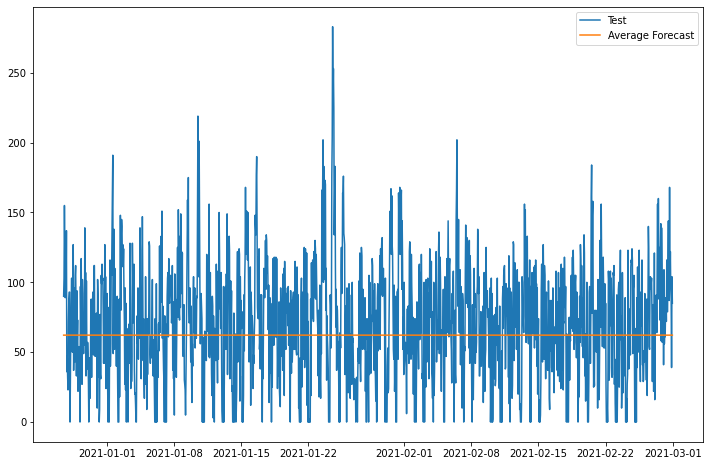

In [438]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['demand'].mean()
plt.figure(figsize=(12,8))
plt.plot(test['demand'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [439]:
rms = sqrt(mean_squared_error(test.demand, y_hat_avg.avg_forecast))
print('RMSE with averaging approach : ', rms)

RMSE with averaging approach :  43.0070559503745


## 3. Moving Average Forecast Approach

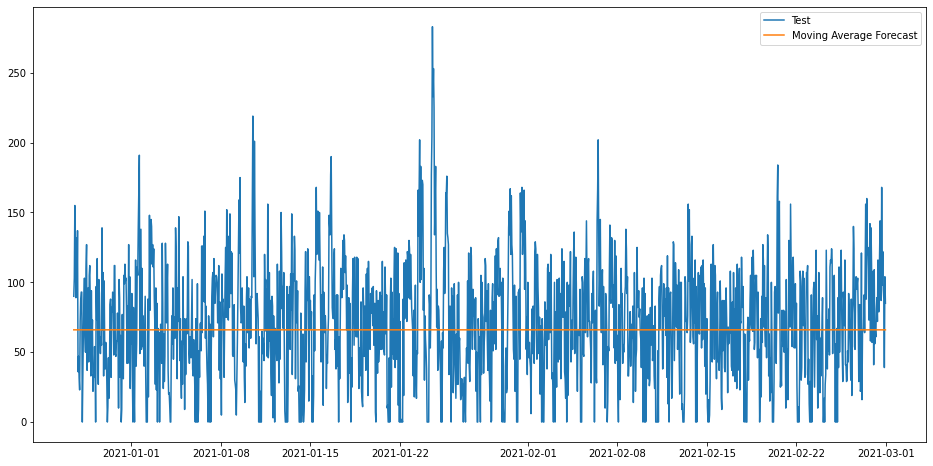

In [440]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['demand'].rolling(60).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(test['demand'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [441]:
rms = sqrt(mean_squared_error(test.demand, y_hat_avg.moving_avg_forecast))
print('RMSE with moving averaging approach : ',rms)

RMSE with moving averaging approach :  42.36480736279984


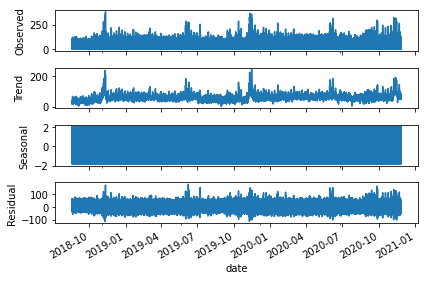

In [442]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.demand,freq=15).plot()
result = sm.tsa.stattools.adfuller(train.demand)
plt.show()

since there is no observable trend it is advised not to use Holt's approach

## 6. Holt's Winter Approach

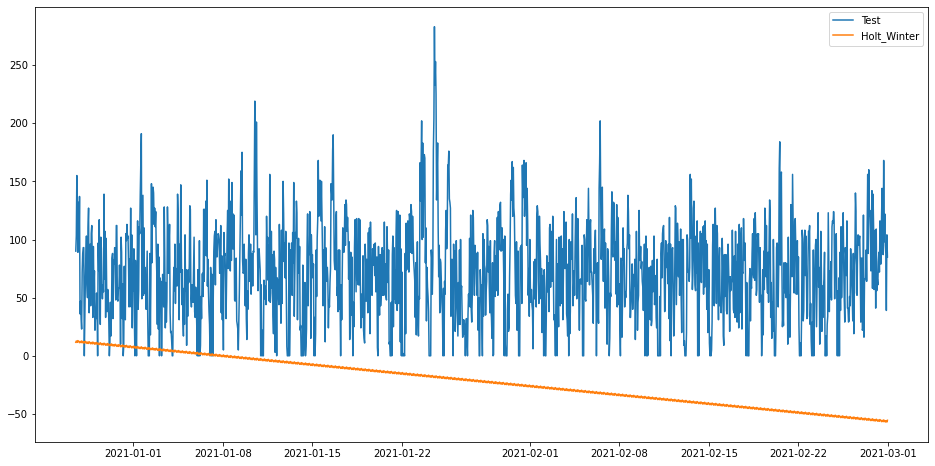

In [445]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['demand']) ,seasonal_periods=7 ,trend='add', seasonal='add').fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( test['demand'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [446]:
rms = sqrt(mean_squared_error(test.demand, y_hat_avg.Holt_Winter))
print("RMSE with Holt's winter approach : ",rms)

RMSE with Holt's winter approach :  104.12444564470233


## 7. Facebook's Prophet Algorithm

In [ ]:
!pip install pystan
!pip install fbprophet

In [447]:
from fbprophet import Prophet

In [448]:
df = pd.read_csv('/content/drive/MyDrive/analytics_vidhya/train_E1GspfA.csv')
d = df.groupby('date')['hour'].apply(list).to_dict()
d = [{k: v} for k, v in d.items()]
a = []
for i in range(0,24):
  a.append(i)
for i in range(len(d)):
  for j in d[i]:
    d[i][j] = a
df1 = pd.DataFrame([{"date": date,"hour":value} for date, value in d[0].items()])
for  i in range(1,len(d)):
  df1 = df1.append([{"date": date,"hour":value} for date, value in d[i].items()])
df1 = df1.explode('hour')
df1['demand'] = 0
df1.reset_index(inplace=True,drop=True)
df = pd.concat([df, df1[~df1['demand'].isin(df['demand'])].dropna()]).sort_values(['date','hour','demand']).reset_index(drop=True)
df['Datetime'] = ''
for i in df.index:
  df.Datetime[i] = df.date[i]+" "+str(df.hour[i])+":00:00"
df['date'] = pd.to_datetime(df['Datetime'], format='%Y-%m-%d %H:%M:%S')
df.drop(['Datetime','hour'],axis=1,inplace=True)
aggregation_functions = {'demand': 'sum'}
df2 =  df.groupby(df['date']).aggregate(aggregation_functions)
df2.reset_index(inplace=True)
df1['demand'] = df2['demand']
df = df1.copy()
df['Datetime'] = ''
for i in df.index:
  df.Datetime[i] = df.date[i]+" "+str(df.hour[i])+":00:00"
df['date'] = pd.to_datetime(df['Datetime'], format='%Y-%m-%d %H:%M:%S')
df.drop(['Datetime','hour'],axis=1,inplace=True)

In [449]:
df_test = pd.read_csv('/content/drive/MyDrive/analytics_vidhya/test_6QvDdzb.csv')
df_test['Datetime'] = ''
for i in df_test.index:
  df_test.Datetime[i] = df_test.date[i]+" "+str(df_test.hour[i])+":00:00"
df_test['date'] = pd.to_datetime(df_test['Datetime'], format='%Y-%m-%d %H:%M:%S')
df_test.drop(['Datetime','hour'],axis=1,inplace=True)
df_test.head()

,date
0,2021-03-01 00:00:00
1,2021-03-01 01:00:00
2,2021-03-01 02:00:00
3,2021-03-01 03:00:00
4,2021-03-01 05:00:00


In [451]:
train=df[0:15000] 
test=df[15000:]
# df.Timestamp = pd.to_datetime(df.date,format='%d-%m-%Y %H:%M') 
# df.index = df.Timestamp 
# train.Timestamp = pd.to_datetime(train.date,format='%d-%m-%Y %H:%M') 
# train.index = train.Timestamp 
# train = train.resample('D').mean() 
# # datetr = train.index
# test.Timestamp = pd.to_datetime(test.date,format='%d-%m-%Y %H:%M') 
# test.index = test.Timestamp 
# # datete = test.index
# test = test.resample('D').mean()

In [452]:
train.index = np.arange(0,len(train))
test.index = np.arange(len(train),len(train)+len(test))

In [ ]:
train['ds'] = train['date']
train['y'] = train['demand']
train.drop(['date','demand'],inplace=True,axis=1)
test['ds'] = test['date']
test['y'] = test['demand']
test.drop(['date','demand'],inplace=True,axis=1)

In [455]:
test.dropna(inplace=True,axis=0)
train.dropna(inplace=True,axis=0)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [465]:
m = Prophet(interval_width=0.95,yearly_seasonality=True,seasonality_prior_scale=7)
fit1 = m.fit(train)
future = m.make_future_dataframe(periods=1000,freq='D')
forecast = m.predict(future)

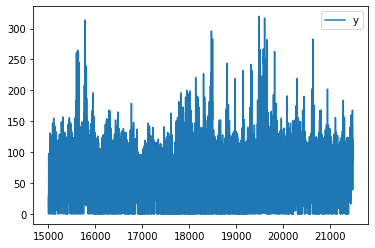

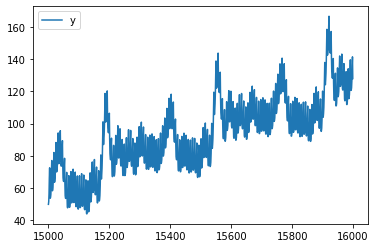

In [473]:
# plt.plot( train.y, label='yt')
for  i in [test.y, forecast.yhat[15000:]]:
  plt.plot(i, label='y')
  plt.legend(loc='best')
  plt.show()

In [474]:
se = np.square(forecast.yhat[626:]-test['y'])
mse = np.mean(se)
rmse = np.sqrt(mse)
print("RMSE with Prophet approach : ",rmse)

RMSE with Prophet approach :  54.44599966296611


In [801]:
# df = pd.read_csv('/content/drive/MyDrive/analytics_vidhya/train_E1GspfA.csv')

## Regression

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/analytics_vidhya/train_E1GspfA.csv')
train=df[0:15000] 
test=df[15000:]
d = train.groupby('date')['hour'].apply(list).to_dict()
d = [{k: v} for k, v in d.items()]
a = []
for i in range(0,24):
  a.append(i)
for i in range(len(d)):
  for j in d[i]:
    d[i][j] = a
train1 = pd.DataFrame([{"date": date,"hour":value} for date, value in d[0].items()])
for  i in range(1,len(d)):
  train1 = train1.append([{"date": date,"hour":value} for date, value in d[i].items()])
train1 = train1.explode('hour')
train1['demand'] = 0
train1.reset_index(inplace=True,drop=True)
train = pd.concat([train, train1[~train1['demand'].isin(train['demand'])].dropna()]).sort_values(['date','hour','demand']).reset_index(drop=True)
train['Datetime'] = ''
for i in train.index:
  train.Datetime[i] = train.date[i]+" "+str(train.hour[i])+":00:00"
train['date'] = pd.to_datetime(train['Datetime'], format='%Y-%m-%d %H:%M:%S')
train.drop(['Datetime','hour'],axis=1,inplace=True)
aggregation_functions = {'demand': 'sum'}
train2 =  train.groupby(train['date']).aggregate(aggregation_functions)
train2.reset_index(inplace=True)
train1['demand'] = train2['demand']
train = train1.copy()
train['Datetime'] = ''
for i in train.index:
  train.Datetime[i] = train.date[i]+" "+str(train.hour[i])+":00:00"
train['date'] = pd.to_datetime(train['Datetime'], format='%Y-%m-%d %H:%M:%S')
train.drop(['Datetime','hour'],axis=1,inplace=True)

In [ ]:
d = test.groupby('date')['hour'].apply(list).to_dict()
d = [{k: v} for k, v in d.items()]
a = []
for i in range(0,24):
  a.append(i)
for i in range(len(d)):
  for j in d[i]:
    d[i][j] = a
test1 = pd.DataFrame([{"date": date,"hour":value} for date, value in d[0].items()])
for  i in range(1,len(d)):
  test1 = test1.append([{"date": date,"hour":value} for date, value in d[i].items()])
test1 = test1.explode('hour')
test1['demand'] = 0
test1.reset_index(inplace=True,drop=True)
test = pd.concat([test, test1[~test1['demand'].isin(test['demand'])].dropna()]).sort_values(['date','hour','demand']).reset_index(drop=True)
test['Datetime'] = ''
for i in test.index:
  test.Datetime[i] = test.date[i]+" "+str(test.hour[i])+":00:00"
test['date'] = pd.to_datetime(test['Datetime'], format='%Y-%m-%d %H:%M:%S')
test.drop(['Datetime','hour'],axis=1,inplace=True)
aggregation_functions = {'demand': 'sum'}
test2 =  test.groupby(test['date']).aggregate(aggregation_functions)
test2.reset_index(inplace=True)
test1['demand'] = test2['demand']
test = test1.copy()
test['Datetime'] = ''
for i in test.index:
  test.Datetime[i] = test.date[i]+" "+str(test.hour[i])+":00:00"
test['date'] = pd.to_datetime(test['Datetime'], format='%Y-%m-%d %H:%M:%S')
test.drop(['Datetime','hour'],axis=1,inplace=True)

In [37]:
test.index = np.arange(len(train),len(train)+len(test))

In [38]:
datetr = train['date'].copy()
datete = test['date'].copy()

In [39]:
def season_calc(month):
    if month in [5,6,7,8,9,10]:
        return "summer"
    else:
        return "winter"

In [40]:
weekdays = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3: 'Thursday', 4: 'Friday', 5:'Saturday', 6:'Sunday'}

train['year'] = train.date.dt.year
train['month'] = train.date.dt.month
train['day'] = train.date.dt.day
train['weekday'] = train.date.dt.weekday.map(weekdays)
train['season'] = train.date.dt.month.apply(season_calc)
train['hour'] = train.date.dt.hour


test['year'] = test.date.dt.year
test['month'] = test.date.dt.month
test['day'] = test.date.dt.day
test['weekday'] = test.date.dt.weekday.map(weekdays)
test['season'] = test.date.dt.month.apply(season_calc)
test['hour'] = test.date.dt.hour

df_test['year'] = df_test.date.dt.year
df_test['month'] = df_test.date.dt.month
df_test['day'] = df_test.date.dt.day
df_test['weekday'] = df_test.date.dt.weekday.map(weekdays)
df_test['season'] = df_test.date.dt.month.apply(season_calc)
df_test['hour'] = df_test.date.dt.hour

cal = calendar()
holidays = cal.holidays(start = train['date'].min(), end = train['date'].max()) 
train['holiday'] = train['date'].isin(holidays)
holidays = cal.holidays(start = test['date'].min(), end = test['date'].max()) 
test['holiday'] = test['date'].isin(holidays)
holidays = cal.holidays(start = df_test['date'].min(), end = df_test['date'].max()) 
df_test['holiday'] = df_test['date'].isin(holidays)
mapped = {True:1, False:0}
train.holiday = train.holiday.map(mapped)
test.holiday = test.holiday.map(mapped)
df_test.holiday = df_test.holiday.map(mapped)

train['non_working'] = train.apply(lambda x: 'non-working' if \
                                         ((x['holiday'] == 1) or (x['weekday'] in ['Saturday', 'Sunday']))
                                         else 'working', axis = 1)
test['non_working'] = test.apply(lambda x: 'non-working' if \
                                         ((x['holiday'] == 1) or (x['weekday'] in ['Saturday', 'Sunday']))
                                         else 'working', axis = 1)

df_test['non_working'] = df_test.apply(lambda x: 'non-working' if \
                                         ((x['holiday'] == 1) or (x['weekday'] in ['Saturday', 'Sunday']))
                                         else 'working', axis = 1)

In [ ]:
d = df.groupby('date')['hour'].apply(list).to_dict()
d = [{k: v} for k, v in d.items()]
a = []
for i in range(0,24):
  a.append(i)
for i in range(len(d)):
  for j in d[i]:
    d[i][j] = a
df1 = pd.DataFrame([{"date": date,"hour":value} for date, value in d[0].items()])
for  i in range(1,len(d)):
  df1 = df1.append([{"date": date,"hour":value} for date, value in d[i].items()])
df1 = df1.explode('hour')
df1['demand'] = 0
df1.reset_index(inplace=True,drop=True)
df = pd.concat([df, df1[~df1['demand'].isin(df['demand'])].dropna()]).sort_values(['date','hour','demand']).reset_index(drop=True)
df['Datetime'] = ''
for i in df.index:
  df.Datetime[i] = df.date[i]+" "+str(df.hour[i])+":00:00"
df['date'] = pd.to_datetime(df['Datetime'], format='%Y-%m-%d %H:%M:%S')
df.drop(['Datetime','hour'],axis=1,inplace=True)
aggregation_functions = {'demand': 'sum'}
df2 =  df.groupby(df['date']).aggregate(aggregation_functions)
df2.reset_index(inplace=True)
df1['demand'] = df2['demand']
df = df1.copy()
df['Datetime'] = ''
for i in df.index:
  df.Datetime[i] = df.date[i]+" "+str(df.hour[i])+":00:00"
df['date'] = pd.to_datetime(df['Datetime'], format='%Y-%m-%d %H:%M:%S')
df.drop(['Datetime','hour'],axis=1,inplace=True)

In [46]:
weekdays = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3: 'Thursday', 4: 'Friday', 5:'Saturday', 6:'Sunday'}

df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day
df['weekday'] = df.date.dt.weekday.map(weekdays)
df['season'] = df.date.dt.month.apply(season_calc)
df['hour'] = df.date.dt.hour

cal = calendar()
holidays = cal.holidays(start = df['date'].min(), end = df['date'].max()) 
df['holiday'] = df['date'].isin(holidays)

mapped = {True:1, False:0}
df.holiday = df.holiday.map(mapped)

df['non_working'] = df.apply(lambda x: 'non-working' if \
                                         ((x['holiday'] == 1) or (x['weekday'] in ['Saturday', 'Sunday']))
                                         else 'working', axis = 1)

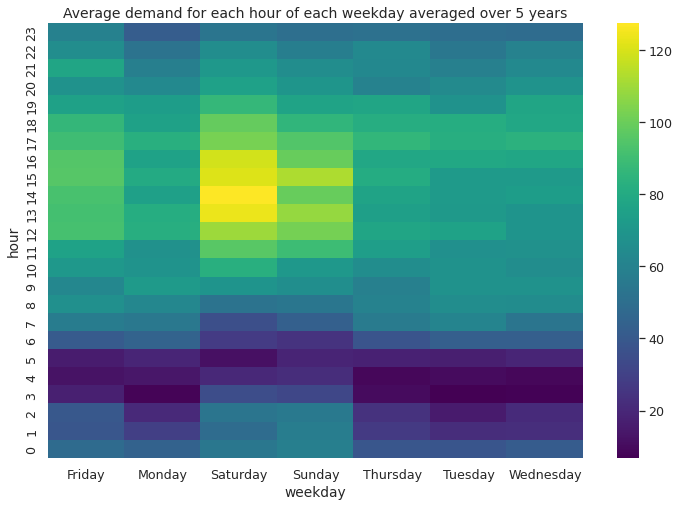

In [776]:
hour_weekday = train.pivot_table(values='demand', index='hour', columns = 'weekday', aggfunc = 'mean')
_ = plt.figure(figsize=(12, 8))
ax = sns.heatmap(hour_weekday.sort_index(ascending = False), cmap='viridis')
#_ = plt.title('Average energy consumption in MWH for each hour of each weekday over the entire period')
_ = ax.set_title("Average demand for each hour of each weekday averaged over 5 years", fontsize = 14)

Text(0.5, 1.0, 'Correlation between features')

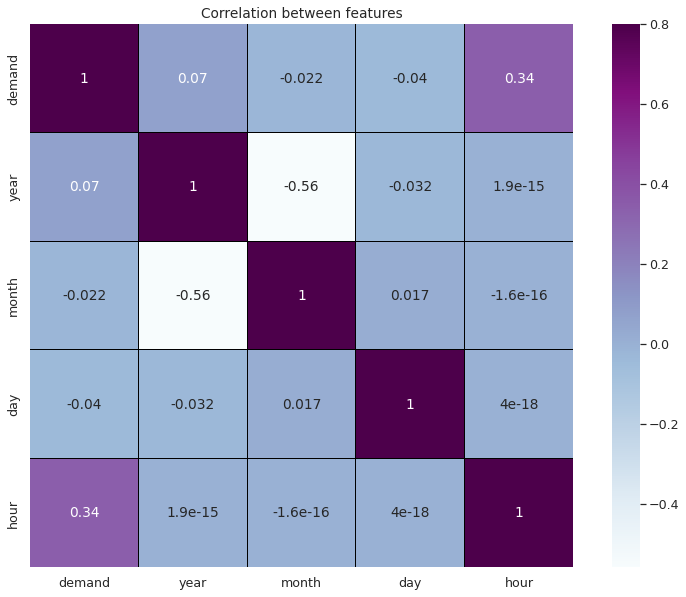

In [777]:
cor = train.corr()
sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(cor, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap="BuPu",linecolor="black")
plt.title('Correlation between features')

(<matplotlib.axes._subplots.AxesSubplot at 0x7fa803a67950>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa803a67950>)

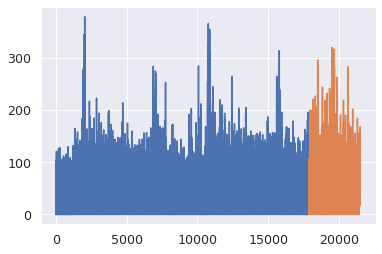

In [778]:
train.demand.plot(),test.demand.plot()

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor)
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.ensemble import VotingRegressor
from scipy import stats
from scipy.stats import zscore
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.utils import resample

In [49]:
le = LabelEncoder()

In [50]:
train['weekday'] = le.fit_transform(train['weekday'])
train['season'] = le.fit_transform(train['season'])
train['non_working'] = le.fit_transform(train['non_working'])
test['weekday'] = le.fit_transform(test['weekday'])
test['season'] = le.fit_transform(test['season'])
test['non_working'] = le.fit_transform(test['non_working'])
df_test['weekday'] = le.fit_transform(df_test['weekday'])
df_test['season'] = le.fit_transform(df_test['season'])
df_test['non_working'] = le.fit_transform(df_test['non_working'])
df['weekday'] = le.fit_transform(df['weekday'])
df['season'] = le.fit_transform(df['season'])
df['non_working'] = le.fit_transform(df['non_working'])

In [782]:
X_train = train.drop(['demand','date'],axis=1)
y_train = train['demand']
X_test = test.drop(['demand','date'],axis=1)
y_test= test['demand']

## XG BOOST

In [783]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [784]:
reg = xgb.XGBRegressor(n_estimators=2000)

In [785]:
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

[12:28:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=2000)

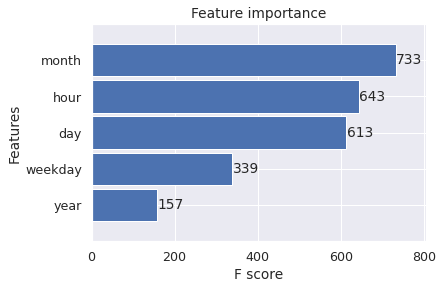

In [786]:
_ = plot_importance(reg, height=0.9)

In [787]:
X_test['pred'] = reg.predict(X_test)

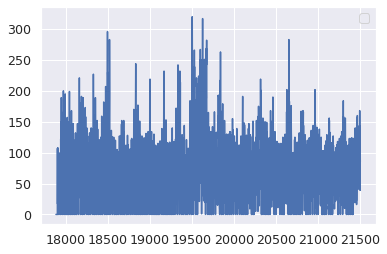

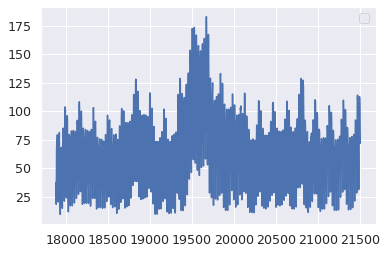

In [788]:
x = [y_test,X_test.pred]
for i in x:
  plt.plot( i)
  # plt.plot( y_test, label='real')
  plt.legend(loc='best')
  plt.show()

In [789]:
rms = mean_squared_error(y_test , X_test.pred, squared=False)
print('RMSE using XGBoost :',rms )

RMSE using XGBoost : 38.27928976629465


## Prophet 2.0

In [ ]:
train['hour'] = train.date.dt.hour
test['hour'] = test.date.dt.hour

In [215]:
train_hourly_frac = train.groupby(['hour']).mean()/np.sum(train.groupby(['hour']).mean())
# hourly_frac.drop(['ID'], axis = 1, inplace = True)
train_hourly_frac.columns = ['fraction']
# test_hourly_frac = train.groupby(['hour']).mean()/np.sum(train.groupby(['hour']).mean())
# hourly_frac.drop(['ID'], axis = 1, inplace = True)
# test_hourly_frac.columns = ['fraction']

In [216]:
train.index = train.date
train.drop(['hour','date'], axis = 1, inplace = True)

daily_train = train.resample('D').sum()
# test.index = test.date
# test.drop(['hour','date'], axis = 1, inplace = True)

# daily_test = test.resample('D').sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [219]:
daily_train['ds'] = daily_train.index
daily_train['y'] = daily_train.demand
daily_train.drop(['demand'],axis = 1, inplace = True)
# daily_test['ds'] = daily_test.index
# daily_test['y'] = daily_test.demand
# daily_test.drop(['demand'],axis = 1, inplace = True)

In [284]:
m = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.1)
m.fit(daily_train)
future = m.make_future_dataframe(periods=len(df_test))
forecast = m.predict(future)

In [288]:
dem =test.copy()
test.drop('demand',inplace=True,axis=1)

In [289]:
test['ds'] = test['date']
test.drop(['hour','date'],axis=1,inplace=True)

In [291]:
# Extract hour, day, month and year from both dataframes to merge
for df in [test, forecast]:
    df['hour'] = df.ds.dt.hour
    df['day'] = df.ds.dt.day
    df['month'] = df.ds.dt.month
    df['year'] = df.ds.dt.year

test = pd.merge(test,forecast, on=['day','month','year'], how='left')
cols = ['hour_x','yhat']
test_new = test[cols]

test_new = pd.merge(test_new, train_hourly_frac, left_on = ['hour_x'], right_index=True, how = 'left')
# # Convert daily aggregate to hourly traffic
test_new['demand'] = test_new['yhat'] * test_new['fraction']
test_new.drop(['yhat','fraction','hour_x'],axis = 1, inplace = True)

In [292]:
dem.index = np.arange(0,len(dem))

In [293]:
rms = np.sqrt((np.square(test_new.demand-dem.demand)).mean())
print('RMSE : ',rms)

RMSE :  38.536775379776344


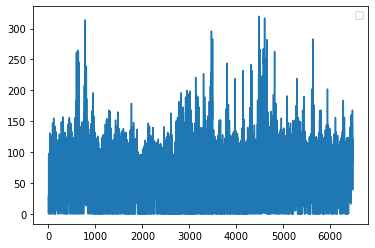

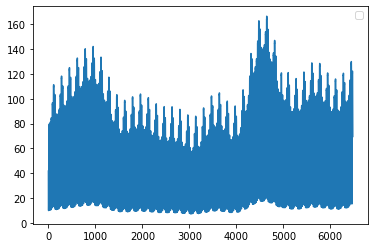

In [294]:
x = [dem.demand,test_new.demand]
for i in x:
  plt.plot( i)
  # plt.plot( y_test, label='real')
  plt.legend(loc='best')
  plt.show()

In [ ]:
df_test['ds'] = df_test['date']
df_test.drop(['date'],axis=1,inplace=True)

In [299]:
# Extract hour, day, month and year from both dataframes to merge
for df in [df_test, forecast]:
    df['hour'] = df.ds.dt.hour
    df['day'] = df.ds.dt.day
    df['month'] = df.ds.dt.month
    df['year'] = df.ds.dt.year

df_test = pd.merge(df_test,forecast, on=['day','month','year'], how='left')
cols = ['hour_x','yhat']
df_test_new = df_test[cols]

df_test_new = pd.merge(df_test_new, train_hourly_frac, left_on = ['hour_x'], right_index=True, how = 'left')
# # Convert daily aggregate to hourly traffic
df_test_new['demand'] = df_test_new['yhat'] * df_test_new['fraction']
df_test_new.drop(['yhat','fraction','hour_x'],axis = 1, inplace = True)

## Conclusion
### from all of the above predictions plot we can clearly see that XGBoost is performing better

In [114]:
predictions = reg.predict(df_test)

In [301]:
finalpred = pd.read_csv('/content/drive/MyDrive/analytics_vidhya/test_6QvDdzb.csv')

In [307]:
# finalpred['demand'] = df_test_new['demand']
finalpred.demand = finalpred.demand.astype(int)

In [308]:
finalpred.shape

(7650, 3)

In [310]:
finalpred.to_csv('predictions.csv',index=False)